## Observations and Insights 

In [ ]:
# Pymaceuticals Data Analysis:
    
#     1.From Boxplot
#          1.a) From the box plot we can understand that the Capomulin and Ramicane are performing well on tumor volume 
#         size(reduction)and in that two (Capomulin and Ramicane) Capomulin is slight better than Ramicane because the 
#         median is close to upper quartile(q3).
#          1.b)Infubinol and Ceftamin are not performing well compare to Capomulin and Ramicane.
            
#     2.From Scatter plot  and linear regression.
#         2.a) From the scatter plot we can understand that the the mouse average weight is correlated with average tumor
#         volume size. it is linear and positively correlated.  
#         2.b) From the linear regression the graph,it is sloping upward.It tells that it is strongly associated with the data.
#         Meaning that if there is increase in average mouse weight then the average tumor volume is increasing. The correlation
#         coefficient (r) value is 0.88, indicating a strong association to a linear positive correlation (sloping upward).
    
#     3.From the Line graph:
#         3.a) The line plot clearly tells that the change over time what happens to the tumor volume. 
#         A sample of a mouse (mouse ID -"f966") which is using the Capomulin Drug is taken for study.The line plot is 
#         starting from upper value and going downwards as time increases. That means the tumor volume is reduced over
#         incerase in time.
#         * In conclution Which tells that the Capomulin Drug is good for reducing the tumor volume of a mouse. 
    

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
mouse_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# mouse_metadata = mouse_metadata.drop_duplicates(subset='Mouse ID', keep=False)
# mouse_metadata.head(10)

In [14]:
# Checking the number of mice using count() method
mouse_count = mouse_data_complete.count()
mouse_count

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#using duplicated() method
mouse_duplicate = study_results[study_results.duplicated(subset="Mouse ID", keep='first')]
mouse_duplicate[['Mouse ID','Timepoint']]


,Mouse ID,Timepoint
137,g989,0
250,a275,5
251,w575,5
252,x822,5
253,l509,5
...,...,...
1888,r944,45
1889,u364,45
1890,p438,45
1891,x773,45


In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
250,a275,5,46.795257,0
251,w575,5,48.913860,1
252,x822,5,45.671104,1
253,l509,5,45.851193,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data_complete.drop_duplicates(subset = ['Mouse ID'],keep= "last")

# clean_mouse_data.reset_index()
clean_mouse_data.rename(columns={"Tumor Volume (mm3)" : "Tumor_volume_mm3"}, inplace = True)
clean_mouse_data.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume_mm3,Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
244,1859,z314,Stelasyn,Female,21,28,5,45.934712,0
245,1862,z435,Propriva,Female,12,26,10,48.710661,0
246,1872,z581,Infubinol,Female,24,25,45,62.754451,3
247,1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
#checking the unique mouse count
unique_mouse_count = clean_mouse_data.nunique() 

In [19]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_data_count = clean_mouse_data.value_counts()
clean_mouse_data_count = clean_mouse_data.count()
clean_mouse_data_count

Mouse ID            249
Drug Regimen        249
Sex                 249
Age_months          249
Weight (g)          249
Timepoint           249
Tumor_volume_mm3    249
Metastatic Sites    249
dtype: int64

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Find groupby for Drug Regimen column
grouped_mouse_data = clean_mouse_data.groupby('Drug Regimen')

# Find mean for grouped mouse data using count() method
tumor_volume_count = grouped_mouse_data['Tumor_volume_mm3'].count()
tumor_volume_count
# Find mean for grouped mouse data using mean() method
tumor_volume_mean = grouped_mouse_data['Tumor_volume_mm3'].mean()
tumor_volume_mean
# Find median for grouped mouse data using meadian() method
tumor_volume_median = grouped_mouse_data['Tumor_volume_mm3'].median()
tumor_volume_median
# Find variance for grouped mouse data using var() method
tumor_volume_var = grouped_mouse_data['Tumor_volume_mm3'].var()
tumor_volume_var
# Find standard deviation for grouped mouse data using std() method
tumor_volume_std = grouped_mouse_data['Tumor_volume_mm3'].std()
tumor_volume_std
# Find SEM for grouped mouse data using sen() method
tumor_volume_sem = grouped_mouse_data['Tumor_volume_mm3'].sem()
# tumor_volume_sem


In [21]:
# Assemble the resulting series into a single summary dataframe.
tumor_volume_summary_groupby = pd.DataFrame({
                                            "Mean" :tumor_volume_mean,
                                            "Median" : tumor_volume_median ,
                                            "Variance" : tumor_volume_var ,
                                            "Standard Deviation" : tumor_volume_std ,
                                            "SEM" :tumor_volume_sem
                                            })
tumor_volume_summary_groupby

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_mouse_data.groupby(clean_mouse_data["Drug Regimen"]).Tumor_volume_mm3.agg(["mean","median","var","std","sem"])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

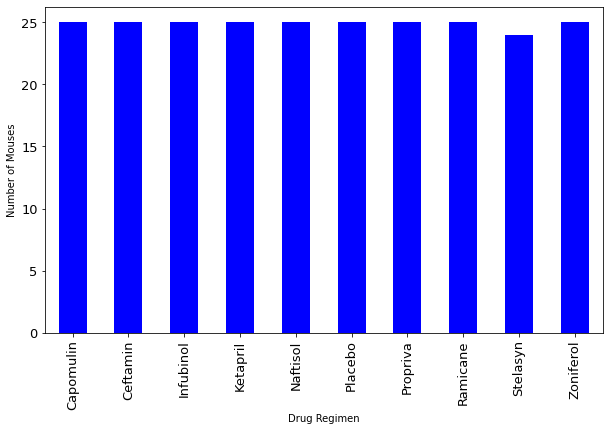

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
grouped_mouse_data.count()
count_makers = grouped_mouse_data['Mouse ID'].count()
count_chart = count_makers.plot(kind='bar',figsize=(10,6), color="blue", fontsize=13)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mouses")

plt.show()
# plt.tight_layout()


<AxesSubplot:xlabel='Drug Regimen'>

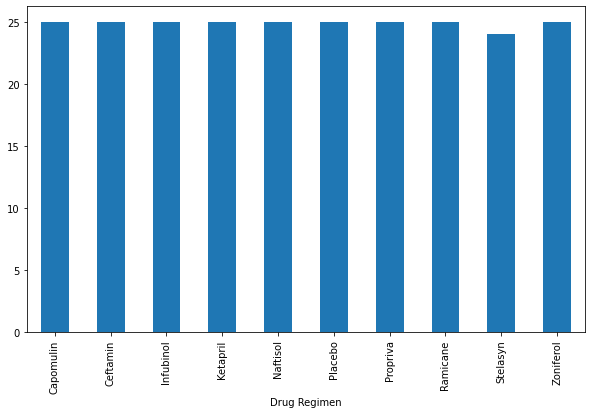

In [24]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# plt.bar(count_makers,y_axis, color='r', alpha=0.5, align="center")
count_makers.plot.bar(figsize=(10,6))

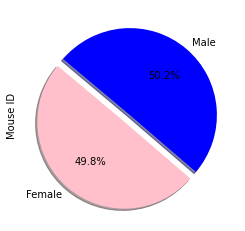

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mouse_data = clean_mouse_data.groupby('Sex')['Mouse ID'].count()
explodes = (0.1, 0)
colors = ["pink", "blue"]
labels = gender_mouse_data.keys()
# sizes = gender_mouse_data.values
gender_mouse_data_pandas_pie = gender_mouse_data.plot(kind='pie', explode=explodes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x19106104bb0>,
 [Text(-0.7771287477781476, -0.9143691319028482, 'Female'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male')],
 [Text(-0.4533251028705861, -0.5333819936099948, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

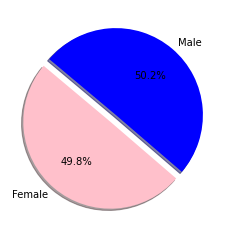

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# The colors of each section of the pie chart
colors = ["pink", "blue"]
explodes = (0.1, 0)
labels = gender_mouse_data.keys()
sizes = gender_mouse_data.values
plt.pie(sizes, explode=explodes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Find the latest tumor volume by drop_duplicates and  keep = "last"
final_tumor_vol = mouse_data_complete.drop_duplicates(subset="Mouse ID", keep="last")

# Filter the "Capomulin" from the Drug Regimen column
capomulin_test = final_tumor_vol[final_tumor_vol['Drug Regimen'] == "Capomulin"]
capomulin_test_data = capomulin_test[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)","Weight (g)"]] 
capomulin_test_data.head()


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Weight (g)
19,s185,Capomulin,45,23.343598,17
29,x401,Capomulin,45,28.484033,15
39,m601,Capomulin,45,28.430964,17
64,f966,Capomulin,20,30.485985,17
104,u364,Capomulin,45,31.023923,17


In [30]:
# Filter the "Ramicane" from the Drug Regimen column
ramicane_test = final_tumor_vol[final_tumor_vol['Drug Regimen'] == "Ramicane"]
ramicane_test_data = ramicane_test[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]] 
ramicane_test_data.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
49,g791,Ramicane,29.128472
59,s508,Ramicane,30.276232
74,m546,Ramicane,30.564625
84,z578,Ramicane,30.638696


In [31]:
# Filter the "Infubinol" from the Drug Regimen column
infubinol_test = final_tumor_vol[final_tumor_vol['Drug Regimen'] == "Infubinol"]
infubinol_test_data = infubinol_test[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]] 
infubinol_test_data.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
463,a203,Infubinol,67.973419
473,a251,Infubinol,65.525743
530,a577,Infubinol,57.031862
540,a685,Infubinol,66.083066
637,c139,Infubinol,72.226731


In [33]:
# Filter the "Ceftamin" from the Drug Regimen column
ceftamin_test = final_tumor_vol[final_tumor_vol['Drug Regimen'] == "Ceftamin"]
ceftamin_test_data = ceftamin_test[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]] 
ceftamin_test_data.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
493,a275,Ceftamin,62.999356
594,b447,Ceftamin,45.000000
600,b487,Ceftamin,56.057749
617,b759,Ceftamin,55.742829
840,f436,Ceftamin,48.722078


In [35]:
 # Put treatments into a list for for loop (and later for plot labels)
 # Calculate the IQR and quantitatively determine if there are any potential outliers.

drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    each_drug_tumor_volume =final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] ==  drug,["Drug Regimen","Tumor Volume (mm3)"]]
    
    # Determine outliers using upper and lower bounds
    quartiles = each_drug_tumor_volume["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq-lowerq
    print(f"<-----The Starting data  is for: {drug}----->")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles.loc[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"<-----The Ending of data  is for: {drug}------->")
    print("       ")


<-----The Starting data  is for: Capomulin----->
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
<-----The Ending of data  is for: Capomulin------->
       
<-----The Starting data  is for: Ramicane----->
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
<-----The Ending of data  is for: Ramicane------->
       
<-----The Starting data  is for: Infubinol----->
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile of Infubinol is: 11.477135160000003
The the 

In [37]:
tumor_vol_capomulin = capomulin_test_data["Tumor Volume (mm3)"]
tumor_vol_ramicane = ramicane_test_data["Tumor Volume (mm3)"]
tumor_vol_infubinol = infubinol_test_data["Tumor Volume (mm3)"]
tumor_vol_ceftamin = ceftamin_test_data["Tumor Volume (mm3)"]

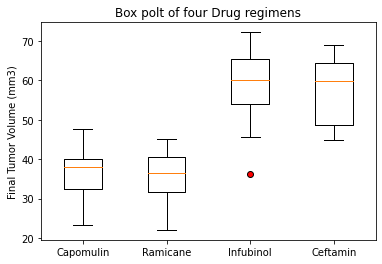

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_vol_data= [tumor_vol_capomulin,tumor_vol_ramicane,tumor_vol_infubinol,tumor_vol_ceftamin]
fig1, ax1 = plt.subplots()
red_circle = dict(markerfacecolor='r')
ax1.set_title('Box polt of four Drug regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, flierprops=red_circle)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

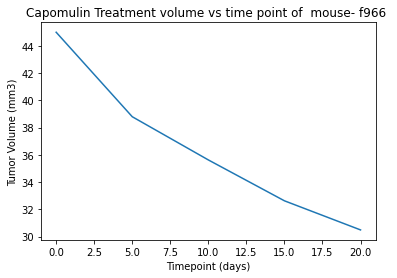

<Figure size 432x288 with 0 Axes>

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
filtered_capomulin= mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"] == "Capomulin"), :]
filtered_capomulin =filtered_capomulin.loc[(filtered_capomulin["Mouse ID"] == "f966"), :]

filtered_capomulin= filtered_capomulin[["Timepoint","Tumor Volume (mm3)"]]
filtered_capomulin= filtered_capomulin.set_index("Timepoint")

# # Plot the graph
filtered_capomulin["Tumor Volume (mm3)"].plot(kind="line")
plt.title("Capomulin Treatment volume vs time point of  mouse- f966 ")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(rotation=0)
plt.show()
plt.tight_layout()



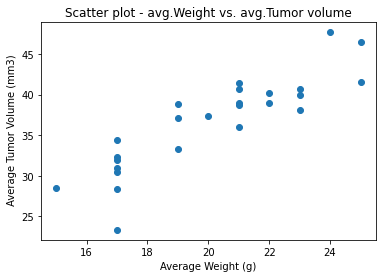

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_drug= capomulin_test_data.set_index("Drug Regimen")
grouped_capomulin = capomulin_drug.groupby('Mouse ID')

#Calculate Tumor Volume mean
capomulin_tumor_mean = (grouped_capomulin["Tumor Volume (mm3)"]).mean()

#Calculate weight mean
capomulin_weight_mean = (grouped_capomulin["Weight (g)"]).mean()

# Creating a new DataFrame for scatter plot
plt.scatter(capomulin_weight_mean, capomulin_tumor_mean)
plt.title("Scatter plot - avg.Weight vs. avg.Tumor volume")
plt.xlabel("Average Weight (g)")
plt.ylabel(" Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

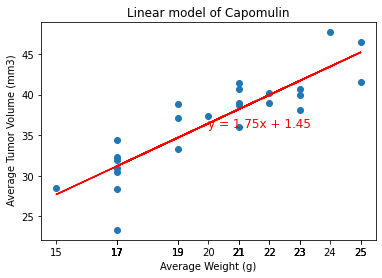

The correlation coefficient between weight and tumor value is 0.88


In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_tumor_mean = (grouped_capomulin["Tumor Volume (mm3)"]).mean()
capo_weight_mean = (grouped_capomulin["Weight (g)"]).mean()

# Perform a linear regression on weight versus average tumor volume
slope, int, r, p, std_err = st.linregress(capo_weight_mean, capo_tumor_mean)
      
# Create equation of line to calculate average tumor volume
fit = slope * capo_weight_mean + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(capo_weight_mean, capo_tumor_mean)
plt.title("Linear model of Capomulin")
plt.xlabel("Average Weight (g)")
plt.ylabel(" Average Tumor Volume (mm3)")
plt.plot(capo_weight_mean,fit,"r-")
plt.annotate(line_eq,(20,36),fontsize=12,color="red")
plt.xticks(capo_weight_mean)
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(capo_weight_mean,capo_tumor_mean)[0],2)
print(f'The correlation coefficient between weight and tumor value is {corr_coefficient}')